In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

news_df=pd.read_csv('/content/gdrive/MyDrive/FS-Sem3/CompanyProject_RegHub/news_df_with_top4_signals.csv')
print(f"Length of raw dataframe = {len(news_df)}")
news_df.head(2)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Length of raw dataframe = 3168


,id,news_date,news_title,news_content,companies_in_news,news_content_embeddings,signal_1,signal_2,signal_3,signal_4
0,maretBeatPresfiling20231003,2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,Deutsche Bank AG has acquired an additional 49...,"Berenberg Bank, Sartorius","tensor([ 8.2298e-03, -1.0426e-01, -1.6461e-02,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Strategic_Steps_cos,Financial_Partnerships_cos
1,busTIMESPresesginvestingubs,2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,The UBS APAC Sustainable Finance Conference 20...,"Answer:\n\nBerenberg, Sebastian Bray","tensor([ 1.5170e-02, 7.4811e-02, -7.3396e-02,...",Financial_Partnerships_cos,Financial_Deals_cos,Capital_Markets_Stock_Analysis_cos,Technological_Deals_Collaborations_cos


<ipython-input-3-e9a3f05f15a8>:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


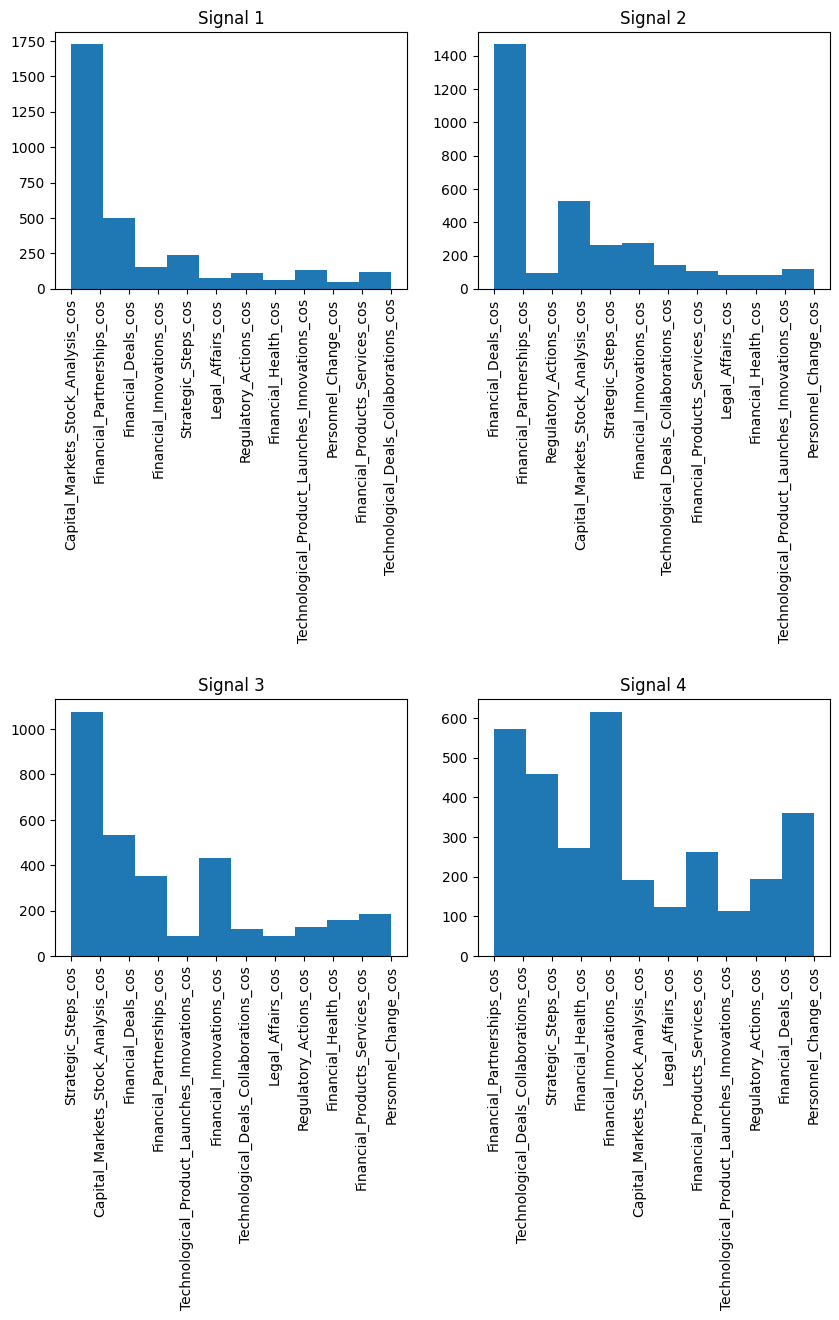

In [3]:
import matplotlib.gridspec as gridspec

# a 2x2 subplot layout
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], hspace=1.6) # gap between the top and bottom rows

ax1 = plt.subplot(gs[0, 0])
ax1.hist(news_df['signal_1'])
ax1.set_title('Signal 1')
ax1.tick_params(axis='x', rotation=90)

ax2 = plt.subplot(gs[0, 1])
ax2.hist(news_df['signal_2'])
ax2.set_title('Signal 2')
ax2.tick_params(axis='x', rotation=90)

ax3 = plt.subplot(gs[1, 0])
ax3.hist(news_df['signal_3'])
ax3.set_title('Signal 3')
ax3.tick_params(axis='x', rotation=90)

ax4 = plt.subplot(gs[1, 1])
ax4.hist(news_df['signal_4'])
ax4.set_title('Signal 4')
ax4.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [4]:
# our pre-defined dictionary of events/signals
event_descriptions = {
    "event": [
        "Financial_Products_Services",
        "Financial_Deals",
        "Financial_Partnerships",
        "Financial_Innovations",
        "Financial_Health",
        "Strategic_Steps",
        "Personnel_Change",
        "Technological_Product_Launches_Innovations",
        "Technological_Deals_Collaborations",
        "Regulatory_Actions",
        "Legal_Affairs",
        "Capital_Markets_Stock_Analysis"
    ],
    "description": [
        "News related to the introduction, withdrawal, or alterations in financial instruments, services, or products offered by a company. This includes launches, discontinuations, and changes in features.",
        "Reports covering financial transactions, such as the placement of new funds or assets in the capital market, as well as support for customer Initial Public Offerings (IPOs) or mergers and acquisitions.",
        "News highlighting collaborations, alliances, or partnerships entered into by a company for financial purposes. This can include joint ventures, strategic alliances, or long-term partnerships.",
        "News regarding the development and introduction of novel financial products or services, often accompanied by whitepapers or patents that showcase innovative approaches or technologies.",
        "Coverage related to the overall well-being of a company from a financial perspective. This encompasses aspects like bankruptcy, valuation changes, solvency issues, and other indicators of financial stability or distress.",
        "News outlining strategic decisions made by a company, such as initial public offerings (IPOs), mergers, acquisitions, expansions, fundraise activities, stock buybacks, and other significant corporate moves.",
        "Reports on changes in a company's workforce, including hirings, firings, the number of employees affected, mass recruitments, and any notable shifts in personnel.",
        "Information about the release of new technological products, services, or innovations. This category covers technological advancements, patents, and research papers hinting at potential tech developments.",
        "News highlighting partnerships, collaborations, or deals related to technology, including joint ventures, technology-sharing agreements, or collaborations for research and development.",
        "Reports on actions taken by or against a company by regulatory bodies. This includes compliance issues, regulatory investigations, and any changes in regulations affecting the company.",
        "News covering legal matters, including lawsuits, penalties, victories, sanctions, warnings, and other legal or compliance-related developments involving the company.",
        "Analyses and reports provided by companies, often banks, regarding stock performance, capital market trends, and insights into specific markets or assets."
    ]
}

events_df = pd.DataFrame(event_descriptions) # dataframe from dictionary
events_df

,event,description
0,Financial_Products_Services,"News related to the introduction, withdrawal, ..."
1,Financial_Deals,"Reports covering financial transactions, such ..."
2,Financial_Partnerships,"News highlighting collaborations, alliances, o..."
3,Financial_Innovations,News regarding the development and introductio...
4,Financial_Health,Coverage related to the overall well-being of ...
5,Strategic_Steps,News outlining strategic decisions made by a c...
6,Personnel_Change,"Reports on changes in a company's workforce, i..."
7,Technological_Product_Launches_Innovations,Information about the release of new technolog...
8,Technological_Deals_Collaborations,"News highlighting partnerships, collaborations..."
9,Regulatory_Actions,Reports on actions taken by or against a compa...


In [5]:
%%capture
%pip install "accelerate>=0.16.0,<1" "transformers[torch]>=4.28.1,<5" "torch>=1.13.1,<2" "bitsandbytes>=0.40.2"

In [6]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

In [7]:
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    pipeline,
)

model_name="meta-llama/Llama-2-7b-chat-hf" # Model from hugging face
device_map = {"": 0} # Load the entire model on the GPU 0
use_4bit = True # Activate 4-bit precision base model loading
bnb_4bit_compute_dtype = "float16" # Compute dtype for 4-bit base models
bnb_4bit_quant_type = "nf4" # Quantization type (fp4 or nf4)
use_nested_quant = False # Activate nested quantization for 4-bit base models (double quantization)
compute_dtype = getattr(torch, bnb_4bit_compute_dtype) # Load tokenizer and model with QLoRA configuration

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
    )

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)
model.config.use_cache = False
model.config.pretraining_tp = 1

# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right" # Fix weird overflow issue with fp16 training

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [8]:
#generate_text = pipeline(task="text-generation", model=model, tokenizer=tokenizer, device_map="auto", torch_dtype=torch.bfloat16, max_length=256)
generate_text = pipeline(task="text-generation", model=model, tokenizer=tokenizer, device_map="auto", torch_dtype=torch.bfloat16)

In [35]:
# template of prompt to be used

system_prompt = """
<s>[INST] <<SYS>>
You are an efficient analyzer of news texts. Always answer very very concisely. Never beat about the bush. No redundant words please. If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
<</SYS>>
"""

instruction_prompt = """
Shared here are two things - content of a news article and an event description. From the news article, spot sentences that announce or discuss or report subjects significantly similar to the event description shared. In your response, only share the relevant sentences from the news article and nothing else. No other text in your response please. If you think, the news article does not talk about anything at all similar to the event description, just reply with 'NOT APPLICABLE'.
"""

eoi_token = "[/INST]"

In [36]:
for event in events_df['event']: # adding event columns in the dataframe
  news_df[event] = ""

news_df = news_df[:20] # trimming the dataset for computation timing; following below is a demo

In [37]:
n = 4 # number of top signals to be considered for every news

for index, row in news_df.iterrows(): # this loop iterates over every row of the news_df
  news = row['news_content']
  for i in range (1, n + 1): # this loop iterates over the top 4 signals for every row
    signal_ = "signal_" + str(i)
    event_ = row[signal_][:-4] # removing the "_cos" string from signal name
    event_description = events_df[events_df['event'] == event_]['description'].iloc[0]
    prompt = system_prompt + " " + instruction_prompt + "NEWS ARTICLE: " + news + " \n" + "EVENT DESCRIPTION: " + event_description + "\n" + eoi_token + "\n"
    res = generate_text(prompt)[0]["generated_text"]
    news_df.at[index, event_] = res.split(eoi_token)[1] # cleaning model response for redundant text

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [38]:
news_df.head(5)

,id,news_date,news_title,news_content,companies_in_news,news_content_embeddings,signal_1,signal_2,signal_3,signal_4,...,Financial_Partnerships,Financial_Innovations,Financial_Health,Strategic_Steps,Personnel_Change,Technological_Product_Launches_Innovations,Technological_Deals_Collaborations,Regulatory_Actions,Legal_Affairs,Capital_Markets_Stock_Analysis
0,maretBeatPresfiling20231003,2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,Deutsche Bank AG has acquired an additional 49...,"Berenberg Bank, Sartorius","tensor([ 8.2298e-03, -1.0426e-01, -1.6461e-02,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Strategic_Steps_cos,Financial_Partnerships_cos,...,"\nFrom the news article, the following sentenc...",,,\nThe relevant sentences from the news article...,,,,,,"\nFrom the news article, the following sentenc..."
1,busTIMESPresesginvestingubs,2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,The UBS APAC Sustainable Finance Conference 20...,"Answer:\n\nBerenberg, Sebastian Bray","tensor([ 1.5170e-02, 7.4811e-02, -7.3396e-02,...",Financial_Partnerships_cos,Financial_Deals_cos,Capital_Markets_Stock_Analysis_cos,Technological_Deals_Collaborations_cos,...,"\nBased on the provided news article, the foll...",,,,,,"\nBased on the provided news article, the foll...",,,"\nBased on the news article provided, the foll..."
2,pubDubaiPresE6B703F1696322785,2023-10-03T13:48:51.000Z,Julius Baer strengthens its External Asset Man...,Swiss private bank Julius Baer is focusing on ...,Julius Baer.,"tensor([-1.6269e-02, -5.6002e-02, -7.3220e-02,...",Financial_Deals_cos,Financial_Partnerships_cos,Capital_Markets_Stock_Analysis_cos,Strategic_Steps_cos,...,\nThank you for sharing the news article and e...,,,"\nBased on the news article provided, the foll...",,,,,,"\nBased on the news article provided, the foll..."
3,einNNewsPres02billionby2027,2023-10-03T12:10:30.000Z,Investment Banking & Trading Services Market S...,The article discusses how major global investm...,Berenberg Bank.,"tensor([ 5.1878e-02, -5.7659e-02, -4.5290e-03,...",Capital_Markets_Stock_Analysis_cos,Regulatory_Actions_cos,Financial_Deals_cos,Financial_Health_cos,...,,,\nThank you for providing the news article and...,,,,,\nHere are the relevant sentences from the new...,,"\nFrom the news article, the following sentenc..."
4,finwscomPresmanagementcrypto,2023-10-03T11:56:08.000Z,The New «Swiss» Finance Mecca finews.com,Nowhere else is wealth management flourishing ...,"SNP SchneiderNeureither & Partner, Berenberg Bank","tensor([ 1.2892e-01, -2.9040e-02, 7.0385e-03,...",Financial_Deals_cos,Capital_Markets_Stock_Analysis_cos,Financial_Partnerships_cos,Financial_Innovations_cos,...,"\nFrom the news article, the following sentenc...","\nFrom the news article, the following sentenc...",,,,,,,,"\nFrom the news article, the following sentenc..."
